In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.stats.proportion as smprop

a)What is the sample mean, variance and standard deviation of the female
births? Express in your own words the story told by these numbers. The
idea is to force you to interpret what can be learned from these numbers.

Def 1.4: Sample mean is sum of observations divided by the
number of observations.
Def 1.10: The sample variance is sum of squared differences from
the sample mean divided by n-1.
Def 1.11: The sample standard deviation is the square root of the
sample variance.

1.1 Infant birth weight

In [ ]:
females_data = np.array([2474, 2547, 2830, 3219, 3429, 3448, 3677, 3872, 4001, 4116])

sum_females = 0
for x in females_data:
    sum_females += x
    
mean = 1/10 * sum_females
print(mean), print(np.mean(females_data))

3361.3
3361.3


(None, None)

In [8]:
n = 10
diff = 0
for a in females_data:
    diff += (a - mean)**2
Var = (diff/(n-1))
print(Var), print(females_data.var(ddof=1))

344920.45555555564
344920.4555555556


(None, None)

In [15]:
SD = np.sqrt(Var)

print(SD), print(females_data.std(ddof=1))

587.299289592245
587.2992895922449


(None, None)

b) Compute the same summary statistics of the male births. Compare and
explain differences with the results for the female births.

In [ ]:
males_data = np.array([2844, 2863, 2963, 3239, 3379, 3449, 3582, 3926, 4151, 4356])

sum_males = 0
for x in males_data:
    sum_males += x
     
mean = 1/10 * sum_males
print(mean), print(np.mean(males_data))

3475.2000000000003
3475.2


(None, None)

In [18]:
n = 10
diff = 0
for a in males_data:
    diff += (a - mean)**2
Var = (diff/(n-1))
print(Var), print(males_data.var(ddof=1))

283158.1777777778
283158.1777777777


(None, None)

In [19]:
SD = np.sqrt(Var)

print(SD), print(males_data.std(ddof=1))

532.1260919911537
532.1260919911537


(None, None)

c) Find the five quartiles for each sample — and draw the two box plots with
pen and paper (i.e. not using Python.)

In [21]:
import numpy as np

# Calculate quartiles
Q1 = np.percentile(females_data, 25)
Q3 = np.percentile(females_data, 75)

# Interquartile Range
IQR = Q3 - Q1

# Calculate fences
lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

print("Q1 (25th percentile):", Q1)
print("Q3 (75th percentile):", Q3)
print("IQR:", IQR)
print("Lower fence:", lower_fence)
print("Upper fence:", upper_fence)


Q1 (25th percentile): 2927.25
Q3 (75th percentile): 3823.25
IQR: 896.0
Lower fence: 1583.25
Upper fence: 5167.25


In [22]:
import numpy as np

# Calculate quartiles
Q1 = np.percentile(males_data, 25)
Q3 = np.percentile(males_data, 75)

# Interquartile Range
IQR = Q3 - Q1

# Calculate fences
lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

print("Q1 (25th percentile):", Q1)
print("Q3 (75th percentile):", Q3)
print("IQR:", IQR)
print("Lower fence:", lower_fence)
print("Upper fence:", upper_fence)


Q1 (25th percentile): 3032.0
Q3 (75th percentile): 3840.0
IQR: 808.0
Lower fence: 1820.0
Upper fence: 5052.0


2. Course grades

In [ ]:
data = {
    'Grade':["Grade12","Grade10","Grade07","Grade04","Grade02","Grade 0", "Grade-03"], 
    'Course 1':[20, 14, 16, 20, 12, 16, 10],
    'Course 2':[14, 14, 27, 22, 27, 17, 22]
}

df = pd.DataFrame(data)
df["Total"] = df["Course 1"] + df["Course 2"]
print(df)

      Grade  Course 1  Course 2  Total
0   Grade12        20        14     34
1   Grade10        14        14     28
2   Grade07        16        27     43
3   Grade04        20        22     42
4   Grade02        12        27     39
5   Grade 0        16        17     33
6  Grade-03        10        22     32


a) What is the median of the 251 achieved grades?

We look at the 251 grades seen from the Total column of the table. Seen from below,
these 251 grades are already ordered, so to find the median we should find the 126th
ordered observation from below. Since there are 104 grades in the -3, 0, and 2 Grade
categories and 42 in the Grade 4 category, the 126th ordered observation from below
is a 4, so the answer is: the median is 4.

In [48]:
df.median(numeric_only=True)

Course 1    16.0
Course 2    22.0
Total       34.0
dtype: float64

b) What are the quartiles and the IQR (Inter Quartile Range)?

In [52]:
Q1 = 0
Q3 = 7
IQR = Q3 - Q1
print(IQR)

7


3. Cholesterol

a) What is the median of the cholesterol measurements for the patients before
treatment, and similarly after treatment?

In [3]:
data = {
    'patient': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],
    'Before': [9.1,8.0,7.7,10.0,9.6,7.9,9.0,7.1,8.3,9.6,8.2,9.2,7.3,8.5,9.5],
    'After': [8.2,6.4,6.6,8.5,8.0,5.8,7.8,7.2,6.7,9.8,7.1,7.7,6.0,6.6,8.4]
}

In [11]:
before_sorted = np.sort(data['Before'])
after_sorted = np.sort(data['After'])

print(before_sorted[7])
print(after_sorted[7])

8.5
7.2


In [10]:
before_series = pd.Series(data['Before'])
after_series = pd.Series(data['After'])
print(before_series.describe())


count    15.000000
mean      8.600000
std       0.902378
min       7.100000
25%       7.950000
50%       8.500000
75%       9.350000
max      10.000000
dtype: float64


In [13]:
quartiles_before = np.quantile(data['Before'],[0,0.25,0.5,0.75,1],method = 'averaged_inverted_cdf')
quartiles_after = np.quantile(data['After'],[0,0.25,0.5,0.75,1],method = 'averaged_inverted_cdf')
## Printing the Quartiles
print(quartiles_before)
print(quartiles_after)

[ 7.1  7.9  8.5  9.5 10. ]
[5.8 6.6 7.2 8.2 9.8]


b) Find the standard deviations of the cholesterol measurements of the pa-
tients before and after treatment.

In [15]:
#Before treatment
mean_before = np.mean(data['Before'])
var_before = np.var(data['Before'])
sd_before = np.sqrt(var_before)
#After treatment
mean_after = np.mean(data['After'])
var_after = np.var(data['After'])
sd_after = np.sqrt(var_after)

print(mean_before), print(mean_after)
print(var_before), print(var_after)
print(sd_before), print(sd_after)
print(np.std(data['Before'], ddof=1))
print(np.std(data['After'], ddof=1))


8.6
7.386666666666667
0.7599999999999998
1.109155555555556
0.8717797887081346
1.0531645434382777
0.9023778112773574
1.0901288696209053


c) Find the sample covariance between cholesterol measurements of the pa-
tients before and after treatment.

In [8]:
# Covariance calculation
cov_matrix = np.cov(data['Before'], data['After'])
covariance = cov_matrix[0, 1]

print(f"Covariance: {covariance:.2f}")

Covariance: 0.80


In [7]:
# Correlation coefficient calculation
correlation = np.corrcoef(data['Before'], data['After'])[0, 1]

print(f"Correlation coefficient: {correlation:.2f}")

Correlation coefficient: 0.81


In [16]:
cov_manual = np.sum((data['Before'] - np.mean(data['Before'])) * (data['After'] -
np.mean(data['After']))) / 14
print(cov_manual)
0.7964285714285715
## or use the inbuilt function
print(np.cov(data['Before'],data['After'], ddof=1))

0.7964285714285715
[[0.81428571 0.79642857]
 [0.79642857 1.18838095]]


d) Find the sample correlation between cholesterol measurements of the pa-
tients before and after treatment

In [18]:
## ’Manually’
print(0.79643/(0.90238*1.0901))
0.8096397271662439
## or
cor = np.cov(data['Before'], data['After'])[0,1]/(np.std(data['Before'],ddof = 1) *
np.std(data['After'],ddof = 1))
print(cor)
0.809618797174745
## or correlation directly in numpy
print(np.corrcoef(data['Before'],data['After']))

0.8096397271662439
0.809618797174745
[[1.        0.8096188]
 [0.8096188 1.       ]]


e) Compute the 15 differences (Dif = Before −After) and do various summary statistics and plotting of these: sample mean, sample variance, sam-
ple standard deviation, boxplot etc.


In [25]:
data['Difference'] = np.array(data['After']) - np.array(data['Before'])

print(data['Difference'])

[-0.9 -1.6 -1.1 -1.5 -1.6 -2.1 -1.2  0.1 -1.6  0.2 -1.1 -1.5 -1.3 -1.9
 -1.1]


[-2.1 -1.6 -1.3 -1.1  0.2]
0.4098095238095241
0.6401636695482836


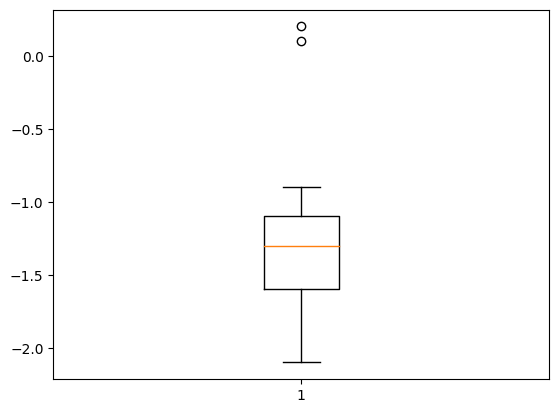

In [26]:
quartiles_dif = np.quantile(data['Difference'],[0,0.25,0.5,0.75,1], method='averaged_inverted_cdf')
print(quartiles_dif)

print(np.var(data['Difference'], ddof=1))
print(np.std(data['Difference'], ddof=1))
    
fig = plt.boxplot(data['Difference'])
plt.show()

The mean effect (decrease of cholesterol due to treatment) would be estimated at
1.2 nMol/l. But clearly there is also a high degree of differences in what the effect
is: the standard deviation of (all) the differences is 0.64. Looking at the boxplot,
we find two patients with values identified as extreme, which from the data table is
seen to be patient no 8 and 10. The better way, maybe, here to tell the story would
be the following: for 2 out of 15 patients (13% of patients) the treatment clearly
had no effect. For the remaining 13 out of 15 (87% of patients) the treatment had
the following average effect and standard deviation (recomputing the mean and
standard deviation for the 13 patients):


f) Observing such data the big question is whether an average decrease in
cholesterol level can be “shown statistically”. How to formally answer
this question is presented in Chapter 3, but consider now which summary
statistics and/or plots would you look at to have some idea of what the
answer will be?

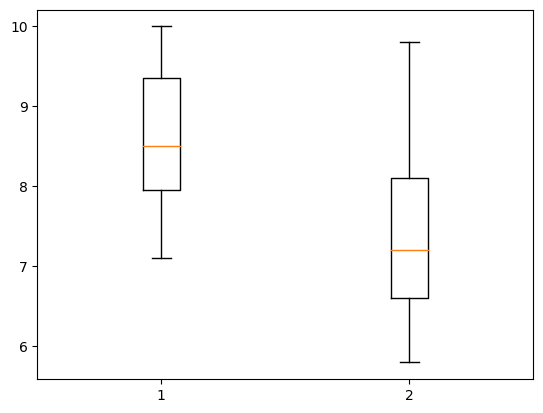

: 

In [ ]:
fig = plt.boxplot([data['Before'],data['After']])
plt.show()

In the previous question we were studying the differences in the attempt to answer
this question. One could also, as we did initially look at the data separately, and e.g.
supplement by the grouped boxplot:

And we would conclude: the average effect is 1.2 (we see no extreme patients in this
plot!), and the standard deviation within each group of data is around 1 (see above:
sbefore = 0.9 and safter = 1.1).
Which of the two approaches do you prefer - the “difference”-approach or the
“separate”-approach?
We would definitely recommend the “difference”-approach, or as we will call it later,
the “paired” approach, since this match the setup of the study, and in the most correct way uses the relevant information. Note how the difference-approach identifies
the outliers/extremes and also ends up with much smaller standard deviations, also
seen by the range and/or box-widths(IQR) in the box-plots. The point is that in the
differences we have removed the variability stemming from the characteristics of
each patient (e.g. body mass, genes, etc.). One phrase used is that in such an experiment like this, a patient acts as his own control, and hence the fact the patients are
different does not blur the important effect signal.

4. Project Start

a) Go to Learn or the website and take a look at the first project. Read the
project page on the website for more information (02323.compute.dtu.dk/projects
or 02402.compute.dtu.dk/projects). Choose a project and read the project
description. Follow the steps to import the data into Python and get started
with the explorative data analysis.
